#Salary Estimation - KNN

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [ ]:
dataset = pd.read_csv('salary.csv')
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   39             13          2174              40  <=50K
1   50             13             0              13  <=50K
2   38              9             0              40  <=50K
3   53              7             0              40  <=50K
4   28             13             0              40  <=50K


In [ ]:
dataset['income'] = dataset['income'].map({"<=50K":0, ">50K":1})
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       39             13          2174              40       0
1       50             13             0              13       0
2       38              9             0              40       0
3       53              7             0              40       0
4       28             13             0              40       0
...    ...            ...           ...             ...     ...
32556   27             12             0              38       0
32557   40              9             0              40       1
32558   58              9             0              40       0
32559   22              9             0              20       0
32560   52              9         15024              40       1

[32561 rows x 5 columns]>


In [ ]:
X = dataset.iloc[:,:-1].values
X

array([[   39,    13,  2174,    40],
       [   50,    13,     0,    13],
       [   38,     9,     0,    40],
       ...,
       [   58,     9,     0,    40],
       [   22,     9,     0,    20],
       [   52,     9, 15024,    40]])

In [ ]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

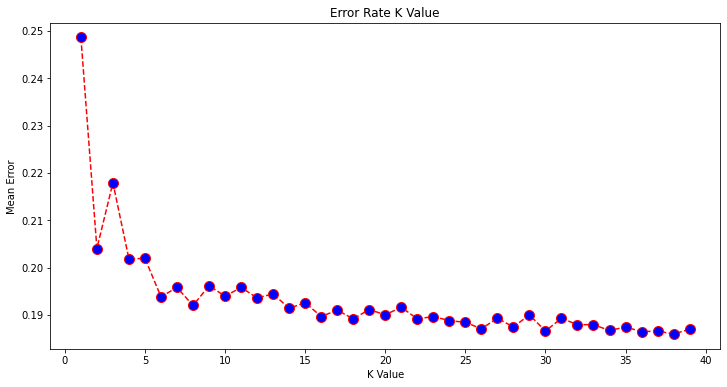

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Calculating error for K values between 1 and 40
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
age = int(input("Enter new employee's age: "))
edu = int(input("Enter new employee's education: "))
cg = int(input("Enter new employee's capital gain: "))
wh = int(input("Enter new employee's hours per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)
if result == 1:
  print('Employee might get salary above 50K')
else:
  print('Employee might not get salary above 50K')

Enter new employee's age: 52
Enter new employee's education: 13
Enter new employee's capital gain: 0
Enter new employee's hours per week: 20
[0]
Employee might not get salary above 50K


In [ ]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm)
print('Accuracy of the Model: {0}%'.format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5847  312]
 [1349  633]]
Accuracy of the Model: 79.5971010932318%
